In [42]:
# dataanalisys stack

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import stat
from scipy.stats import kurtosis, skew, norm, mode


# SO
import os
import json
import re

In [43]:
dados = pd.read_csv('../../output_data/datasets/all_data.csv')

C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_12152\2228565897.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('../../output_data/datasets/all_data.csv')


In [44]:
dados[dados.CPF_consulta == 8990249988] 

,id_pagas,date_pagas,undefined_pagas,CPF_pagas,provider_pagas,contrato_pagas,partiner_pagas,proventos_pagas,tabela,id_consulta,...,CPF_consulta,status_consulta,provider_key_consulta,created_consulta,update_consulta,partiner_consulta,message_consulta,CPF_storm,ADE,CMSRepassada
2035378,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,6d9b56b1-8096-46a2-b089-383789f2a9ec,...,8990249988,failed,6d9b56b1-8096-46a2-b089-383789f2a9ec,2025-09-25 17:13:34.227256,2025-09-25 17:13:34.227256,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51
2035381,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,ec13ab1f-485a-4778-9256-e4375c632f79,...,8990249988,failed,ec13ab1f-485a-4778-9256-e4375c632f79,2025-09-25 17:13:35.656867,2025-09-25 17:13:35.656867,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51
2035418,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,60b862b3-3339-425f-9941-a0d461905b4a,...,8990249988,failed,60b862b3-3339-425f-9941-a0d461905b4a,2025-09-25 17:14:22.805764,2025-09-25 17:14:22.805764,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51
2035936,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,acc938e3-424e-40f4-9195-ae0dfba36a4e,...,8990249988,completed,acc938e3-424e-40f4-9195-ae0dfba36a4e,2025-09-25 17:23:57.711149,2025-09-25 17:23:57.711149,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51


In [45]:
dados.columns

Index(['id_pagas', 'date_pagas', 'undefined_pagas', 'CPF_pagas',
       'provider_pagas', 'contrato_pagas', 'partiner_pagas', 'proventos_pagas',
       'tabela', 'id_consulta', 'provider_consulta', 'CPF_consulta',
       'status_consulta', 'provider_key_consulta', 'created_consulta',
       'update_consulta', 'partiner_consulta', 'message_consulta', 'CPF_storm',
       'ADE', 'CMSRepassada'],
      dtype='object')

In [46]:
## calcuilar conversao por create_at
# sucessos
sucesso = dados[(dados.status_consulta == 'completed') & (dados.CPF_pagas.notna())][['created_consulta', 'status_consulta', 'CPF_consulta']]

In [47]:
sucesso[sucesso.duplicated(subset='CPF_consulta')]

,created_consulta,status_consulta,CPF_consulta
15701,2025-09-01 04:54:51.816689,completed,9528082939
18575,2025-09-01 05:46:17.740888,completed,28084376845
19883,2025-09-01 06:15:47.046816,completed,6059211720
21886,2025-09-01 07:16:26.223620,completed,45876276820
21912,2025-09-01 07:17:14.734334,completed,32385364867
...,...,...,...
2284935,2025-09-28 23:24:17.298385,completed,1879787784
2284940,2025-09-28 23:24:22.763010,completed,2172367907
2285454,2025-09-28 23:35:07.334400,completed,9288363980
2286068,2025-09-28 23:48:18.838042,completed,11820987620


In [48]:
index_drop = sucesso.index

In [49]:
sem_sucesso = dados.loc[~dados.index.isin(index_drop), ['created_consulta', 'status_consulta', 'CPF_consulta']]

In [50]:
sem_sucesso

,created_consulta,status_consulta,CPF_consulta
0,2025-09-01 00:00:00.972400,failed,2429916100
1,2025-09-01 00:00:04.695924,failed,9702514916
2,2025-09-01 00:00:05.064011,failed,2483824200
3,2025-09-01 00:00:05.075418,failed,40378791826
4,2025-09-01 00:00:08.340843,completed,22858008
...,...,...,...
2286604,2025-09-28 23:59:54.842211,failed,71048445208
2286605,2025-09-28 23:59:54.873518,failed,53471563687
2286606,2025-09-28 23:59:54.980850,failed,9038568592
2286607,2025-09-28 23:59:56.059465,completed,15438494827


### Agrupando

In [51]:
## sucesso
sucesso['created_consulta'] = pd.to_datetime(sucesso['created_consulta']).dt.strftime('%Y-%m-%d %H:%M')
counts_sucesso = sucesso['created_consulta'].value_counts()
df_sucesso = pd.DataFrame(counts_sucesso)
#df_sucesso['datetime'] = df_sucesso.index
df_sucesso.reset_index(inplace=True)
df_sucesso.columns = ['created_consulta', 'count_pagas']

In [52]:
df_sucesso

,created_consulta,count_pagas
0,2025-09-08 12:21,17
1,2025-09-12 12:28,16
2,2025-09-08 13:18,16
3,2025-09-08 11:16,15
4,2025-09-25 12:57,15
...,...,...
28778,2025-09-14 16:44,1
28779,2025-09-14 16:45,1
28780,2025-09-14 16:48,1
28781,2025-09-14 17:00,1


In [53]:
## sucesso
sem_sucesso['created_consulta'] = pd.to_datetime(sem_sucesso['created_consulta']).dt.strftime('%Y-%m-%d %H:%M')
counts_sem_sucesso = sem_sucesso['created_consulta'].value_counts()
df_sem_sucesso = pd.DataFrame(counts_sem_sucesso)
#df_sem_sucesso['datetime'] = df_sem_sucesso.index
df_sem_sucesso.reset_index(inplace=True)
df_sem_sucesso.columns = ['created_consulta', 'count_nao_pagas']

In [54]:
df_sem_sucesso

,created_consulta,count_nao_pagas
0,2025-09-02 00:35,151
1,2025-09-01 22:51,146
2,2025-09-08 21:45,140
3,2025-09-02 00:57,137
4,2025-09-02 00:58,137
...,...,...
38505,2025-09-20 08:07,3
38506,2025-09-20 08:03,3
38507,2025-09-24 04:38,2
38508,2025-09-20 08:04,2


In [55]:
## merge 
teste = pd.merge(left=df_sem_sucesso, right=df_sucesso, on='created_consulta', how='outer')

In [56]:
teste.fillna(0, inplace=True)

In [57]:
teste.sample(5)

,created_consulta,count_nao_pagas,count_pagas
23570,2025-09-17 10:39,42,3.0
31259,2025-09-22 20:11,28,4.0
28679,2025-09-21 01:11,49,2.0
6671,2025-09-05 15:11,53,5.0
25872,2025-09-19 01:01,58,3.0


In [58]:
teste['total_consultas'] = teste['count_nao_pagas'] + teste['count_pagas']
teste['conversao'] = round(teste['count_pagas'] / teste['total_consultas'], 2)

In [59]:
teste.sort_values(by='created_consulta', inplace=True)
teste

,created_consulta,count_nao_pagas,count_pagas,total_consultas,conversao
0,2025-09-01 00:00,32,0.0,32.0,0.00
1,2025-09-01 00:01,29,0.0,29.0,0.00
2,2025-09-01 00:02,36,0.0,36.0,0.00
3,2025-09-01 00:03,34,1.0,35.0,0.03
4,2025-09-01 00:04,30,1.0,31.0,0.03
...,...,...,...,...,...
38505,2025-09-28 23:55,43,0.0,43.0,0.00
38506,2025-09-28 23:56,49,1.0,50.0,0.02
38507,2025-09-28 23:57,51,0.0,51.0,0.00
38508,2025-09-28 23:58,43,0.0,43.0,0.00


In [60]:
teste['created_consulta'] = pd.to_datetime(teste['created_consulta'])

<Axes: xlabel='created_consulta', ylabel='conversao'>

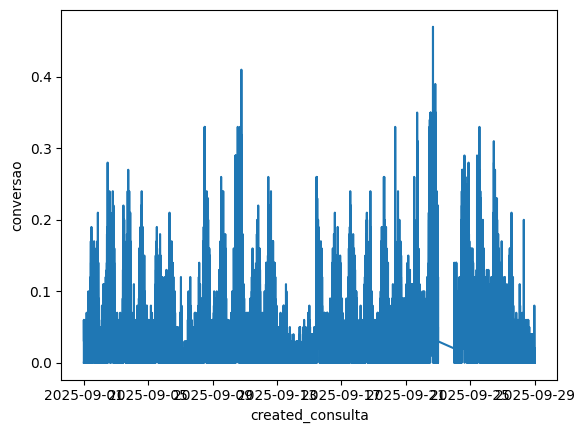

In [61]:
sns.lineplot(data=teste, y = 'conversao', x = 'created_consulta')

In [62]:
teste['retorno_total'] = round(teste['total_consultas'] / teste['total_consultas'].shift(), 2)
teste['retorno_conversao'] = round(teste['conversao'] / teste['conversao'].shift(), 2)


In [63]:
teste.set_index(teste['created_consulta'], inplace=True)
plot = teste[['total_consultas', 'count_pagas']].resample("H").sum()

C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_12152\2447317590.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot = teste[['total_consultas', 'count_pagas']].resample("H").sum()


In [64]:
# plt.figure(figsize=(10, 6))
# sns.barplot(data = teste, x = 'created_consulta', y = 'total_consultas', alpha = .4, color = 'purple', label = 'Consultas')
# sns.barplot(data = teste, x = 'created_consulta', y = 'count_pagas', alpha = .8, color = 'red', label='Contratos pagos')
# plt.xticks(rotation = 90)
# plt.tight_layout()

In [65]:
## decompondo séries
teste.replace([np.inf, -np.inf], np.nan, inplace=True)

In [66]:
teste['retorno_conversao'].fillna(method='bfill', inplace=True)
teste['retorno_total'].fillna(method='bfill', inplace=True)

C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_12152\2481142572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  teste['retorno_conversao'].fillna(method='bfill', inplace=True)
C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_12152\2481142572.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  teste['retorno_conversao'].fillna(method='bfill', inplace=True)
C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_

In [67]:
teste['cumsum_consultas_retorno'] = np.cumsum(teste['retorno_total'])
teste['cumsum_total_conversao'] = np.cumsum(teste['retorno_conversao'])


In [68]:
teste.dropna(inplace=True)

In [69]:
teste.columns

Index(['created_consulta', 'count_nao_pagas', 'count_pagas', 'total_consultas',
       'conversao', 'retorno_total', 'retorno_conversao',
       'cumsum_consultas_retorno', 'cumsum_total_conversao'],
      dtype='object')

In [70]:
teste = teste[['total_consultas', 'count_pagas']].resample('H').sum()

C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_12152\2586179442.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  teste = teste[['total_consultas', 'count_pagas']].resample('H').sum()


<Axes: ylabel='Density'>

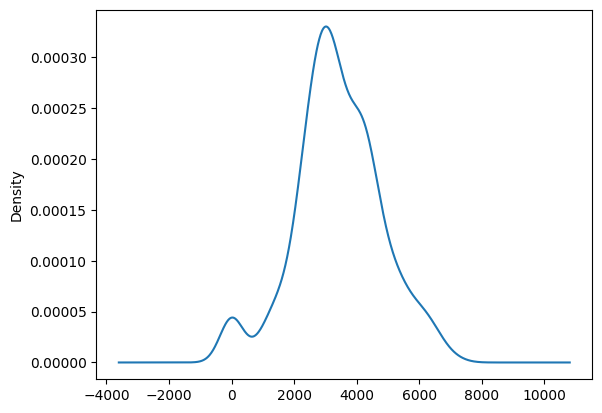

In [71]:
teste.total_consultas.plot(kind='kde')

<Axes: ylabel='Density'>

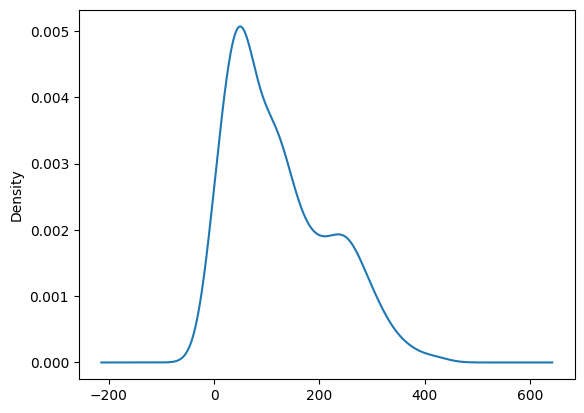

In [72]:
teste.count_pagas.plot(kind='kde')

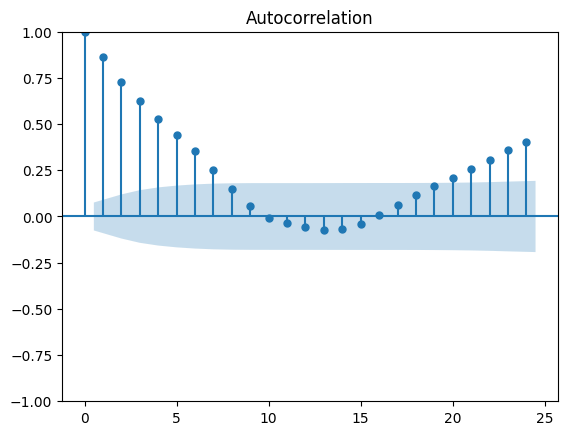

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(teste['count_pagas'].dropna(), lags=24)
plt.show()

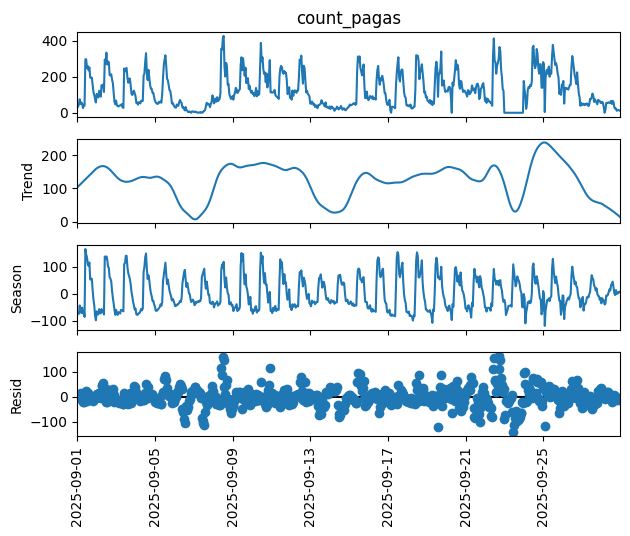

In [79]:
from statsmodels.tsa.seasonal import STL

stl = STL(teste['count_pagas'].dropna(), period=24)
res = stl.fit()
res.plot()
plt.xticks(rotation = 90)
plt.show()


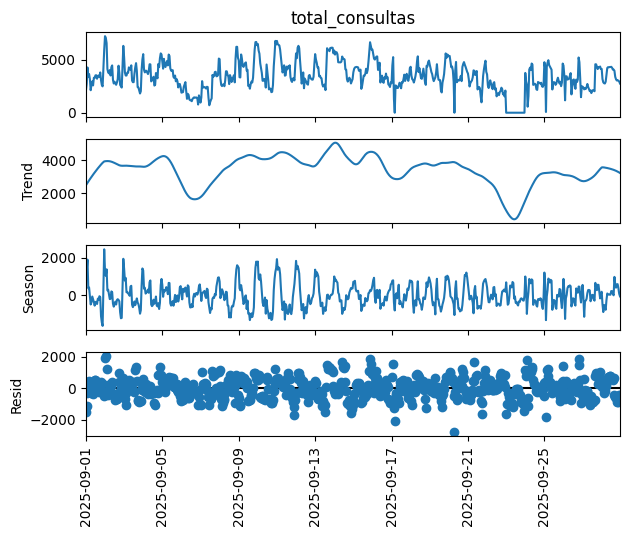

In [80]:
stl = STL(teste['total_consultas'].dropna(), period=24)
res = stl.fit()
res.plot()
plt.xticks(rotation = 90)
plt.show()


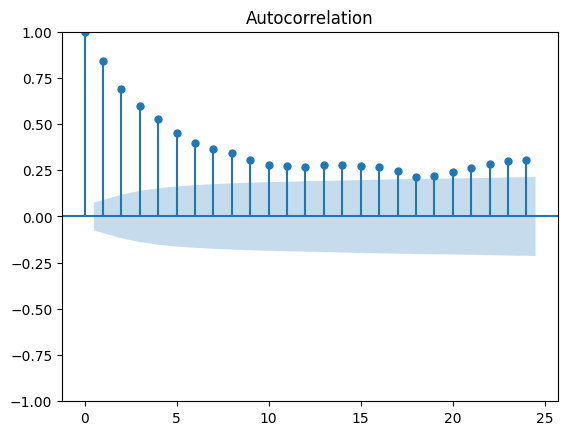

In [82]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(teste['total_consultas'].dropna(), lags=24)
plt.show()

In [ ]:
teste['horario_consulta'] = teste.index.hour

In [112]:
teste.sample(5)

,total_consultas,count_pagas,horario_consulta
created_consulta,,,
2025-09-06 11:00:00,1176.0,31.0,11
2025-09-17 15:00:00,3163.0,174.0,15
2025-09-24 16:00:00,2892.0,355.0,16
2025-09-19 12:00:00,3077.0,284.0,12
2025-09-01 19:00:00,3055.0,157.0,19


In [115]:
teste[['total_consultas', 'count_pagas']].corr(method='spearman')

,total_consultas,count_pagas
total_consultas,1.000000,0.106996
count_pagas,0.106996,1.000000


In [89]:
por_hora = teste.groupby('horario_consulta')[['total_consultas', 'count_pagas']].mean()

In [90]:
por_hora['taxa_aprovacao'] = por_hora['count_pagas'] / por_hora['total_consultas']

In [98]:
por_hora.sort_index(inplace=True)
por_hora

,total_consultas,count_pagas,taxa_aprovacao
horario_consulta,,,
0,4332.678571,81.928571,0.018909
1,3881.428571,74.428571,0.019176
2,3663.785714,62.250000,0.016991
3,3568.107143,70.214286,0.019678
4,3527.250000,72.750000,0.020625
5,3534.250000,75.678571,0.021413
6,3403.000000,72.857143,0.021410
7,3190.464286,72.285714,0.022657
8,3601.250000,78.214286,0.021719


<Axes: title={'center': 'Taxa de aprovação por hora'}, xlabel='horario_consulta'>

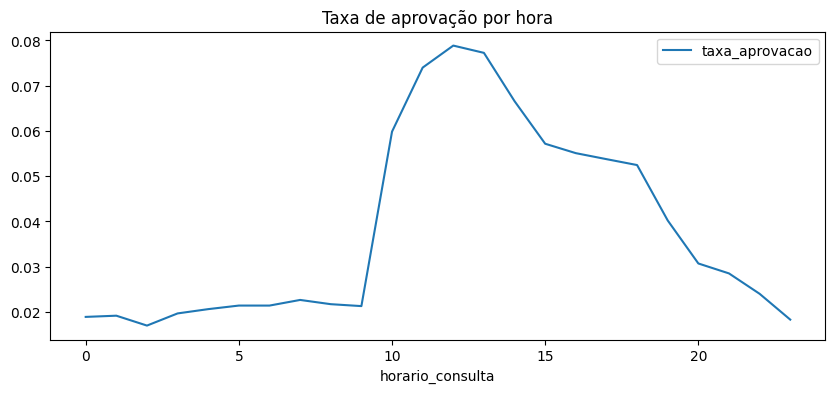

In [100]:
por_hora.plot(y='taxa_aprovacao', kind='line', figsize=(10,4), title='Taxa de aprovação por hora')

<Axes: title={'center': 'Consultas'}, xlabel='horario_consulta'>

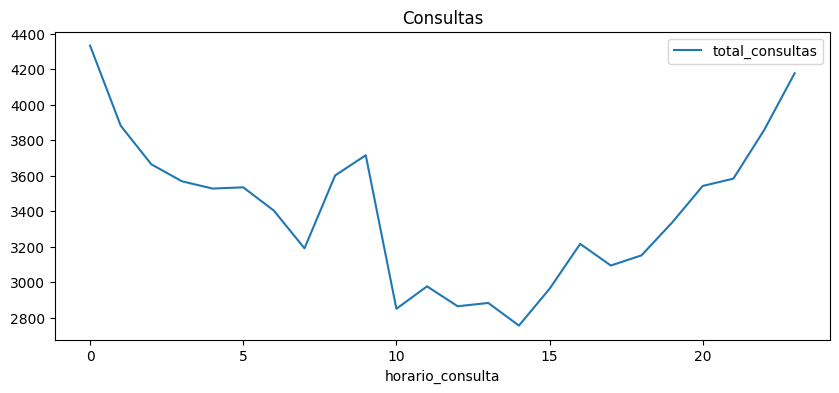

In [107]:
por_hora.plot(y='total_consultas', kind='line', figsize=(10,4), title='Consultas')

In [105]:
por_hora['hora'] = por_hora.index

In [106]:
import statsmodels.api as sm
anova = sm.stats.anova_lm(sm.OLS.from_formula('taxa_aprovacao ~ C(hora)', data=por_hora).fit())
anova


c:\Users\Cleiton - Financeiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


,df,sum_sq,mean_sq,F,PR(>F)
C(hora),23.0,1.076998e-02,0.000468,0.0,NaN
Residual,0.0,3.354729e-32,inf,NaN,NaN


In [117]:
import statsmodels.api as sm

In [126]:
offset = np.log1p(teste['total_consultas'])

In [127]:
y = teste['count_pagas']

In [128]:
teste.sample(5)

,total_consultas,count_pagas,horario_consulta
created_consulta,,,
2025-09-10 02:00:00,5558.0,110.0,2
2025-09-26 11:00:00,2464.0,255.0,11
2025-09-03 19:00:00,2100.0,106.0,19
2025-09-19 07:00:00,3326.0,43.0,7
2025-09-02 22:00:00,4251.0,60.0,22


In [129]:
x = teste['horario_consulta']

In [130]:
x = sm.add_constant(x, prepend=False)

In [131]:
poison_model = sm.GLM(y, x, family=sm.families.Poisson(), offset=offset)

In [132]:
poison_result = poison_model.fit()

In [133]:
print(poison_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            count_pagas   No. Observations:                  672
Model:                            GLM   Df Residuals:                      670
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27651.
Date:                Mon, 03 Nov 2025   Deviance:                       51222.
Time:                        16:17:00   Pearson chi2:                 5.72e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9867
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
horario_consulta     0.0260      0.000  

In [135]:
import statsmodels.api as sm
import numpy as np
from statsmodels.genmod import families

offset = np.log1p(teste['total_consultas'])

Y = teste['count_pagas']
X = teste['horario_consulta']
X = sm.add_constant(X, prepend=False) 

nb_model = sm.GLM(Y, X, family=families.NegativeBinomial(), offset=offset)
nb_results = nb_model.fit()

print(nb_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            count_pagas   No. Observations:                  672
Model:                            GLM   Df Residuals:                      670
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3791.6
Date:                Mon, 03 Nov 2025   Deviance:                       490.20
Time:                        16:21:38   Pearson chi2:                     412.
No. Iterations:                    11   Pseudo R-squ. (CS):            0.05782
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
horario_consulta     0.0436      0.006  

c:\Users\Cleiton - Financeiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


analisa por ciclos de conversao (consultas noite x aprovacao dia)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.genmod import families

# --- 1. CONFIGURAÇÃO E CRIAÇÃO DO DATAFRAME DE EXEMPLO ---
# (Substitua esta seção pelo carregamento do seu DataFrame real)
data = {
    'created_consulta': pd.to_datetime(['2025-09-06 11:00:00', '2025-09-17 15:00:00', 
                                         '2025-09-24 16:00:00', '2025-09-19 12:00:00', 
                                         '2025-09-01 19:00:00', '2025-09-01 22:00:00', # Consultas da noite
                                         '2025-09-02 01:00:00', '2025-09-02 11:00:00', # Consultas da noite + Contratos do dia
                                         '2025-09-02 15:00:00']), 
    'total_consultas': [1176.0, 3163.0, 2892.0, 3077.0, 3055.0, 4000.0, 2000.0, 0.0, 0.0], # 0.0 onde é conversão
    'count_pagas': [31.0, 174.0, 355.0, 284.0, 0.0, 0.0, 0.0, 250.0, 150.0] # 0.0 onde é consulta
}
df = pd.DataFrame(data)
df.set_index('created_consulta', inplace=True)
# --- FIM DO DATAFRAME DE EXEMPLO ---


# --- 2. CRIAÇÃO DO ID DO CICLO DE CONVERSÃO ---

# O ciclo de conversão (que contém a saída/contrato) é definido pelo dia em que a atividade diurna (contrato) ocorre.
# A atividade de consulta da noite anterior (após as 18h) é atribuída ao dia seguinte.

def get_ciclo_id(timestamp):
    # Se a hora for após 18h, o ciclo de conversão pertence ao dia seguinte.
    if timestamp.hour >= 18:
        return timestamp.date() + pd.Timedelta(days=1)
    # Se a hora for antes de 18h (incluindo 00h-17h59), o ciclo de conversão pertence ao dia atual.
    else:
        return timestamp.date()

df['ID_Ciclo'] = df.index.to_series().apply(get_ciclo_id)

# --- 3. AGRUPAMENTO DOS DADOS POR CICLO ---

df_ciclo = df.groupby('ID_Ciclo').agg(
    Soma_count_pagas=('count_pagas', 'sum'),
    Soma_total_consultas=('total_consultas', 'sum')
)

# Remover ciclos onde o volume total de consultas é zero para evitar problemas com log(0)
df_ciclo = df_ciclo[df_ciclo['Soma_total_consultas'] > 0].copy()


# --- 4. CONFIGURAÇÃO E AJUSTE DO MODELO GLM BINOMIAL NEGATIVA ---

# 4.1. Definir Variáveis
Y = df_ciclo['Soma_count_pagas']

# X não tem preditores, apenas o Intercepto. Adicionamos a constante.
X = sm.add_constant(pd.Series([1] * len(df_ciclo), index=df_ciclo.index), prepend=False)
X.rename(columns={0: 'const'}, inplace=True)

# 4.2. Definir o Offset
offset = np.log(df_ciclo['Soma_total_consultas'])

# 4.3. Ajustar o Modelo Binomial Negativa
nb_model = sm.GLM(
    Y, 
    X, 
    family=families.NegativeBinomial(), 
    offset=offset
)
nb_results = nb_model.fit()

# --- 5. EXIBIR RESULTADOS ---
print("--- Sumário do Modelo Binomial Negativa por Ciclo ---")
print(nb_results.summary())

# --- 6. EXTRAIR A TAXA MÉDIA DO CICLO ---
const_coef = nb_results.params['const']
taxa_media_ciclo = np.exp(const_coef)

print("\n----------------------------------------------------")
print(f"Coeficiente do Intercepto (ln da Taxa Média): {const_coef:.4f}")
print(f"Taxa de Conversão Média do Ciclo (Exponencial): {taxa_media_ciclo:.4f} ({taxa_media_ciclo*100:.2f}%)")
print("----------------------------------------------------")